In [ ]:
# CHEM E 465 HW4 Sebastian K
# Question 4
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

T = 400;

k1 = 0.1; k1rev = 0.05;
k2 = 0.2;
k3 = 0.02; k3rev = 10.0;
k4 = 1.2;

# **4b** #

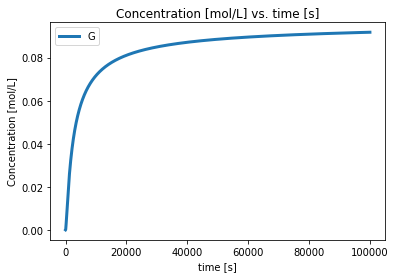

Time where species G >= 0.08 mol/L:  18202  seconds, or  5.056111111111111  hours


In [ ]:
# Initial Concentrations
C0 = np.array([1.2, 1.2, 0, 0, 0, 0, 0]) # Species A through G

# Defining our ODE
def dCdt(C,t):

  # for ease of readability of each ODE
  CA = C[0]; CB = C[1]; CC = C[2]; CD = C[3]; CE = C[4]; CF = C[5]; CG = C[6];

  # Write out expression for each ODE
  dCdt = np.zeros(7, dtype=float)
  dCdt[0] = -k1*CA*CB**2 + k1rev*CC*CD - k3*(CE**2)*CA + k3rev*CF;
  dCdt[1] = -2*k1*CA*CB**2 + 2*k1rev*CC*CD;
  dCdt[2] = k1*CA*CB**2 - k1rev*CC*CD - k2*CC*CD**3;
  dCdt[3] = -3*k2*CC*CD**3 + k1*CA*CB**2 - k1rev*CC*CD;
  dCdt[4] = -2*k3*CA*CE**2 + 2*k3rev*CF + k2*CC*CD**3;
  dCdt[5] = k3*(CE**2)*CA - k3rev*CF - k4*CF;
  dCdt[6] = k4*CF;

  return dCdt

# Make a nice empty t vector to do our differentiation over
t = np.arange(0, 10**5, 1);

sol_4b = odeint(dCdt, C0, t)

# this function takes a solution array (from odeint) and a title string (for graphs)
# then plots a figure of concentration of species G over time
def figs (solution, title):
  # figure of only species G
  plt.figure()
  plt.plot(t,solution[:,6],linewidth='3',label='G')
  plt.xlabel('time [s]')
  plt.ylabel('Concentration [mol/L]')
  plt.title(title)
  plt.legend()
  plt.show()

# here I call the function that I defined above. I pass it my solution array from
# when I ran odeint as well as my desired title for my graphs (as a string)
figs(sol_4b, "Concentration [mol/L] vs. time [s]")

# Now, we look for index where we exceed 0.08 mol/L of species G

# timecalc function take a "solution" array and "desired" concentration then 
# returns the time where that concentration is reached.
def timecalc(solution, desired):
  found = bool(False); # stays false until we reach desired concentration
  index = 0;

  for j in range (0, len(t)):
    if (found == bool(False) and solution[j,6] >= desired):
      index = j;
      found = bool(True); # prevents index from updating after initially reaching 0.08
  return index

time_4b = timecalc(sol_4b, 0.08);

print("Time where species G >= 0.08 mol/L: ", time_4b, " seconds, or ", (time_4b)/3600, " hours")

# **4c** #

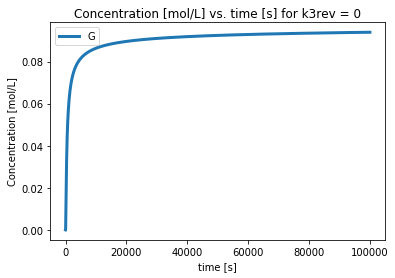

Time where species G >= 0.08 mol/L for k3rev = 0:  4226  seconds, or  1.173888888888889  hours


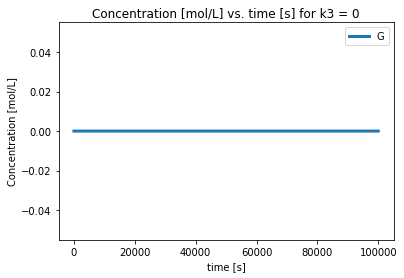

In [ ]:
k3rev = 0;
sol_4c_case1 = odeint(dCdt, C0, t)
time_4c_case1 = timecalc(sol_4c_case1, 0.08)
figs(sol_4c_case1, "Concentration [mol/L] vs. time [s] for k3rev = 0")

print("Time where species G >= 0.08 mol/L for k3rev = 0: ", time_4c_case1, " seconds, or ", (time_4c_case1)/3600, " hours")

k3rev = 10.0; k3 = 0;
sol_4c_case2 = odeint(dCdt, C0, t)
time_4c_case2 = timecalc(sol_4c_case2, 0.08)
figs(sol_4c_case2, "Concentration [mol/L] vs. time [s] for k3 = 0")

Note the graph for the case where k3 = 0 - it is constant at zero. This makes sense as the only way F can be produced initially is through the forward reaction (3), so if k3 = 0 then that is impossible. Thus concentration of G remains at zero with respect to time.

# **4d** #

In [ ]:
# We can calculate our new k1rev using the Arrhenius relation
Ea_orig = 20;
Ea_new = 18;
R = 1.987*10**-3; # [=] kcal/(mol K)
T = 400;

A = k1rev / np.exp(-Ea_orig/(R*T));
k1rev_new = A*np.exp(-Ea_new/(R*T));
print("The new reaction rate constant is: ", k1rev_new, "in units of L/(mol s)")


The new reaction rate constant is:  0.6191696594523244 in units of L/(mol s)


# **4e** #

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


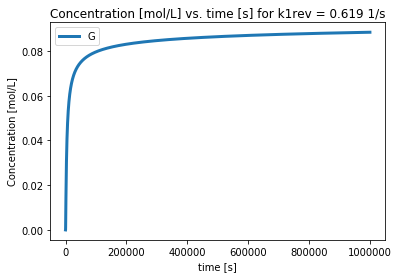

Time where species G >= 0.08 mol/L for k1rev = 0.619:  107490  seconds, or  29.858333333333334  hours


In [ ]:
t = np.arange(0, 10**6, 1);
k1rev = k1rev_new;
k3 = 0.02;
sol_4e = odeint(dCdt, C0, t)
time_4e = timecalc(sol_4e, 0.08)
figs(sol_4e, "Concentration [mol/L] vs. time [s] for k1rev = 0.619 1/s")

print("Time where species G >= 0.08 mol/L for k1rev = 0.619: ", time_4e, " seconds, or ", (time_4e)/3600, " hours")


The Joker has made it take much longer to produce a concentration of 0.08 mol/L of Poison Ivy's zombie repellant G. The time it takes is around 24 hours longer than the original case. This makes sense as the reaction (1) reverse rate constant was increased significantly by the Joker, preventing the formation of C and D which are precursors to the formation of G.